In [150]:
#fetch dataset

!wget https://raw.githubusercontent.com/MSPawanRanjith/FileTransfer/master/kmean_dataset.csv

--2020-06-04 19:14:00--  https://raw.githubusercontent.com/MSPawanRanjith/FileTransfer/master/kmean_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1841 (1.8K) [text/plain]
Saving to: ‘kmean_dataset.csv.3’

kmean_dataset.csv.3 100%[===================>]   1.80K  --.-KB/s    in 0s      

2020-06-04 19:14:01 (22.7 MB/s) - ‘kmean_dataset.csv.3’ saved [1841/1841]



In [0]:
#import libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn import mixture
from math import log

In [152]:
#read data, convert to dataframe,numpy array

data=pd.read_csv('kmean_dataset.csv')
X=data.to_numpy()

fig = px.scatter_3d(X, x=0, y=1, z=2)
fig.show()

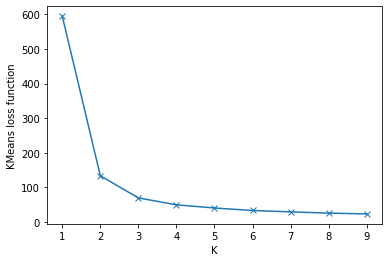

In [153]:
#plot loss function to find elbow point (rough estimation)

from sklearn.cluster import KMeans

loss = []
ks = range(1, 10, 1)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_jobs=1)
    kmeans.fit(X)
    loss.append(kmeans.inertia_)
    
plt.plot(ks, loss, 'x-')
plt.xlabel("K")
plt.ylabel("KMeans loss function")
plt.show()

In [0]:
#Not clear what the elbow point could be, rough plot for 3 clusters

kmeans = KMeans(n_clusters=3, n_jobs=-1)
kmeans.fit(X)
p_label = kmeans.labels_

In [155]:
# Demo of the rough result

data['p_label'] = p_label
XY = data.to_numpy()
fig = px.scatter_3d(XY, x=0, y=1, z=2, color=3)
fig.show()

In [0]:
#this function computes the BIC values and returns them. They are not first order derivated.
def BIC(kmeans):
    D, N, K = kmeans.cluster_centers_.shape[1], len(kmeans.labels_), kmeans.n_clusters
    num_count = np.zeros(K, dtype=int)
    for label in kmeans.labels_:
        num_count[label] += 1
    sigma_square = kmeans.inertia_ / (D * N)
    
    bic = 0
    for count in num_count:
        bic -= 2 * count * np.log(count * 1.0 / N)
    
    bic += N*D * np.log(2 * np.pi * sigma_square)
    
    bic += kmeans.inertia_ / (sigma_square)
    bic += K * (D + 1) * np.log(N)
    return bic

In [0]:
#using GMM from sklearn
def calculate_bic(X, ks, cov):
    bics = []
    best_k = 1
    best_bic = float('inf')
    best_kmeans = None

    for k in ks:
        gmm = mixture.GaussianMixture(n_components=k,
                                      covariance_type=cov)
        gmm.fit(X)
        bic=gmm.bic(X)
        bics.append(bic)
        if bic < best_bic:
            best_k = k
            best_bic = bic
            best_kmeans = kmeans
            
    return bics, best_k, best_bic, best_kmeans

In [0]:
#plot for differt covariance_types
def plotit(cov):
  ks = range(1, 10, 1)
  bics, best_k, best_bic, best_kmeans = calculate_bic(X, ks, cov)
  plt.plot(ks, bics, 'x-')
  plt.xlabel("K")
  plt.ylabel("KMeans BIC")
  plt.show()  

  print("Best number of k by BIC", best_k)

For Tied Covariance Type


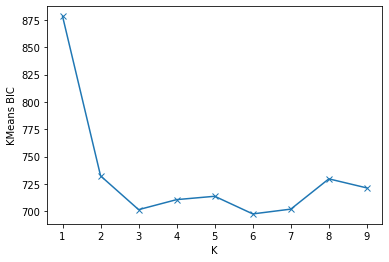

Best number of k by BIC 6


In [159]:
print("For Tied Covariance Type")
plotit('tied')

For full Covariance Type


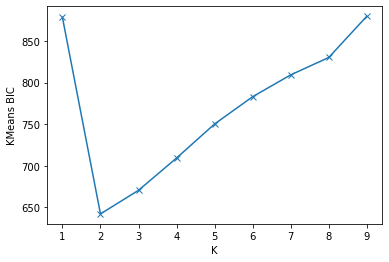

Best number of k by BIC 2


In [160]:
print("For full Covariance Type")
plotit('full')

# suggests making strictly 2 clusters 

For Spherical Covariance Type


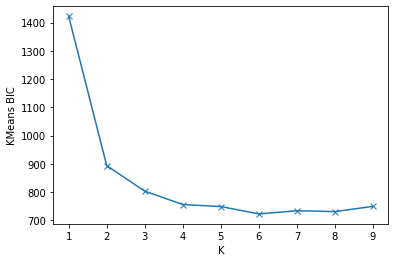

Best number of k by BIC 6


In [161]:
print("For Spherical Covariance Type")
plotit('spherical')

For Diag Covariance Type


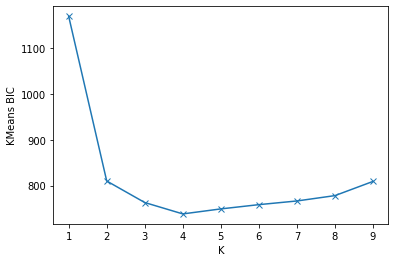

Best number of k by BIC 4


In [162]:
print("For Diag Covariance Type")
plotit('diag')

In [0]:
#find optimal BIC value
def calculate_bic_own(X, ks):
    bics = []
    best_k = 1
    best_bic = float('inf')
    best_kmeans = None

    for k in ks:
        kmeans = KMeans(n_clusters=k, n_jobs=-1)
        kmeans.fit(X)
        bic = BIC(kmeans)
        bics.append(bic)
        if bic < best_bic:
            best_k = k
            best_bic = bic
            best_kmeans = kmeans
            
    return bics, best_k, best_bic, best_kmeans

[1422.6276597512606, 965.039438864781, 823.1654244913179, 761.5521320260483, 747.1543626535165, 746.4732223815435, 747.2981989108572, 738.3988116539997, 768.7896170135432]


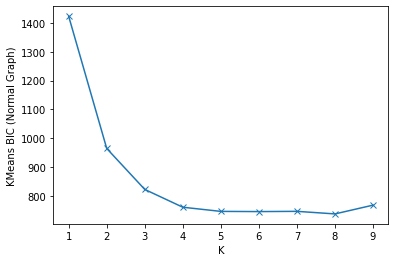

Best number of k by BIC 8


In [164]:
#direct BIC scores
ks = range(1, 10, 1)
bics, best_k, best_bic, best_kmeans = calculate_bic_own(X, ks)
print(bics)
plt.plot(ks, bics, 'x-')
plt.xlabel("K")
plt.ylabel("KMeans BIC (Normal Graph)")
plt.show()
print("Best number of k by BIC", best_k)

[-457.5882208864796, -299.7311176299713, -101.74365341936635, -38.00553091890072, -7.282328979327531, 6.651905757766599, 5.2530745033278095, -3.346361648113202, -3.7281722012255614]


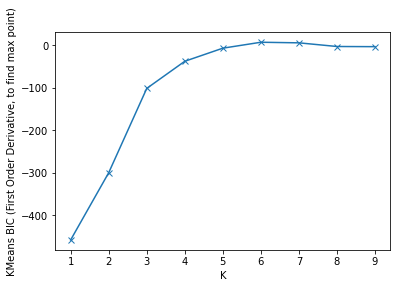

Best number of k by BIC 6


In [165]:
#BIC first derivative curve
ks = range(1, 10, 1)
bics, best_k, best_bic, best_kmeans = calculate_bic_own(X, ks)
bicscpy = np.gradient(np.array(bics)).tolist()
print(bicscpy)
plt.plot(ks, bicscpy, 'x-')
plt.xlabel("K")
plt.ylabel("KMeans BIC (First Order Derivative, to find max point)")
plt.show()
print("Best number of k by BIC", best_k)

In [166]:
# As 7 was obtained as the best number for K, we split the 
kmeans = KMeans(n_clusters=7, n_jobs=-1)
kmeans.fit(X)
p_label = kmeans.labels_

print("Predicted Labels")
print(p_label)
print("Cluster Centre Vectors")
print(kmeans.cluster_centers_)

Predicted Labels
[1 5 5 5 1 1 5 1 5 5 1 5 5 5 1 1 1 1 1 1 1 1 5 1 5 5 1 1 1 5 5 1 1 1 5 5 1
 1 5 1 1 5 5 1 1 5 1 5 1 5 0 0 0 3 0 6 0 3 0 3 3 3 3 6 3 0 6 3 6 3 6 3 6 6
 0 0 0 0 6 3 3 3 3 6 3 0 0 6 3 3 3 6 3 3 3 3 3 0 3 3 4 6 2 4 4 2 3 2 4 2 4
 4 4 6 6 4 4 2 2 6 4 6 2 6 4 2 6 6 4 2 2 2 4 6 4 2 4 4 6 4 4 4 6 4 4 4 6 4
 4 6]
Cluster Centre Vectors
[[6.55714286 3.05       4.6       ]
 [5.24285714 3.66785714 1.5       ]
 [7.475      3.125      6.3       ]
 [5.52307692 2.61538462 3.91923077]
 [6.54166667 3.05       5.52916667]
 [4.70454545 3.12272727 1.41363636]
 [6.00416667 2.74166667 4.83333333]]


In [167]:
data['p_label'] = p_label
XY = data.to_numpy()
fig = px.scatter_3d(XY, x=0, y=1, z=2, color=3)
fig.show()

# Conclusion

The optimum number of clusters were found to be 7 using Bayesian Information Criterion. Other K values may also suffice needs depending on the Covariance Types.  